Explore the special cows with special indexes, which were born in one farm but live in another farm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set()

The number of the special records in farm a624fb9a: 4500
The number of cows with special records: 8


The number of the special records in farm f454e660: 2234
The number of cows with special records: 4


The number of the special records in farm 540275a1: 0
The number of cows with special records: 0


The number of the special records in farm ab18b151: 2169
The number of cows with special records: 4


The number of the special records in farm 752efd72: 0
The number of cows with special records: 0


The number of the special records in farm 5b581702: 6
The number of cows with special records: 6


The number of the special records in farm 5c06d92d: 0
The number of cows with special records: 0


The number of the special records in farm ad0a39f5: 32259
The number of cows with special records: 109


The number of the special records in farm a756bc39: 427
The number of cows with special records: 76




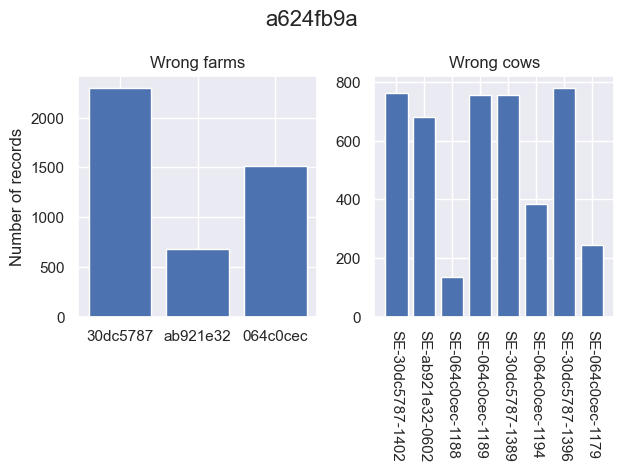

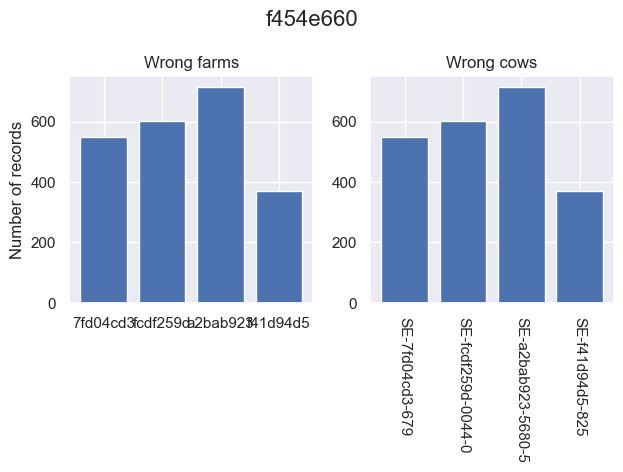

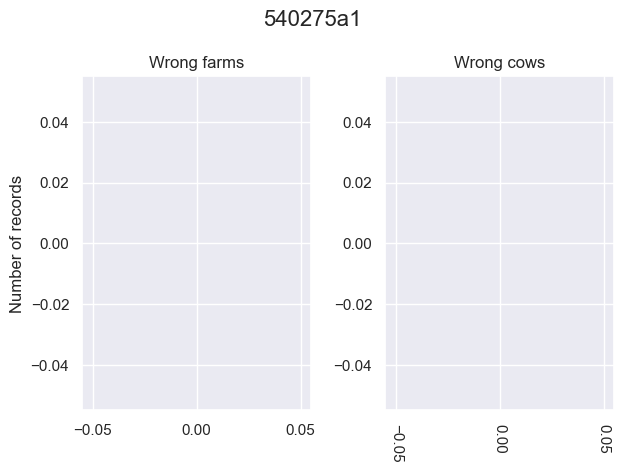

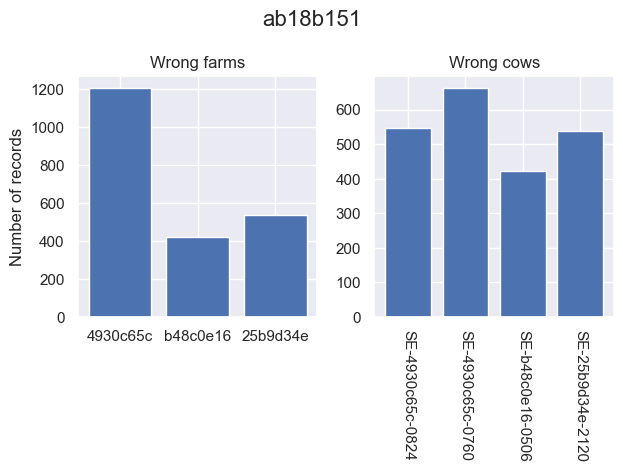

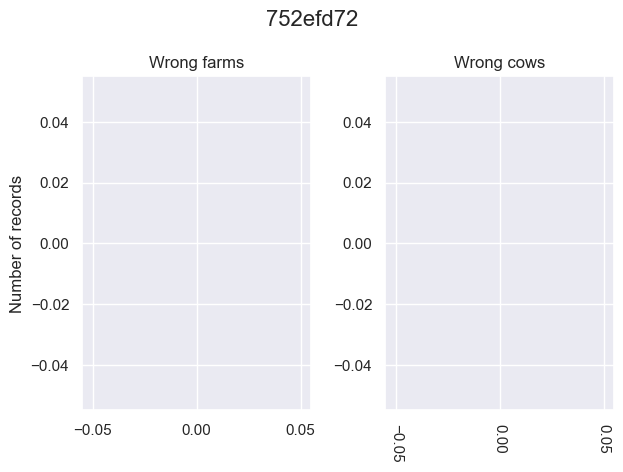

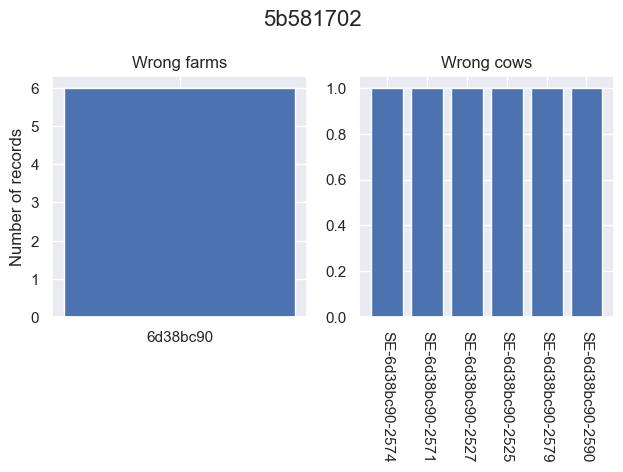

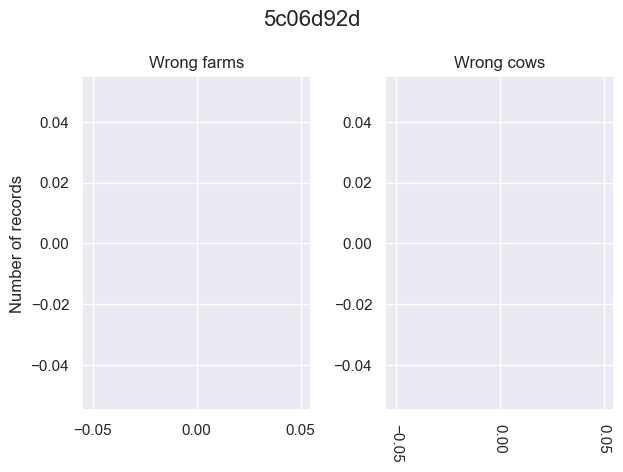

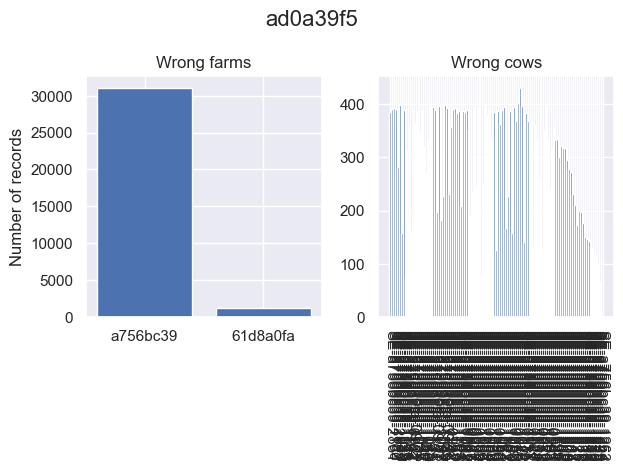

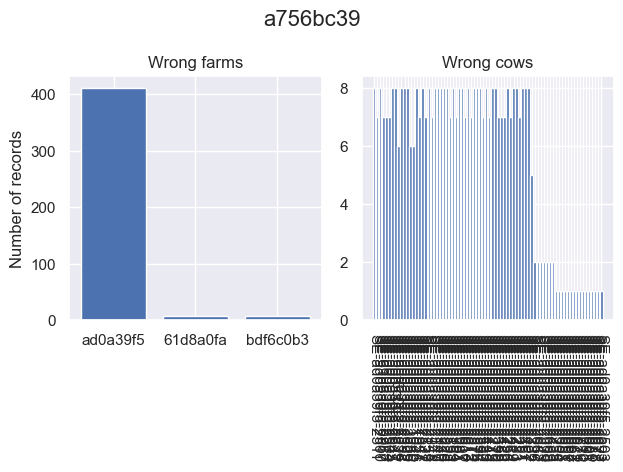

In [2]:
read_path = "AllMilkingsDaily_Weather.csv"
allmilking = pd.read_csv(read_path)
farms = allmilking["FarmName_Pseudo"].unique()
for farm in farms:
    milk = allmilking[allmilking["FarmName_Pseudo"] == farm]
    yeild = pd.DataFrame(milk,columns = ["SE_Number","Timestamp","DailyYield","FarmName_Pesudo"])
    yeild["DailyYield"].dropna()
    # the records that do not contain the corresponding Farm Pseudo
    yeild = yeild.loc[~yeild["SE_Number"].str.contains(f"{farm}")]
    print(f"The number of the special records in farm {farm}: {yeild.shape[0]}")
    lst = yeild["SE_Number"].unique()
    print(f"The number of cows with special records: {lst.shape[0]}")
    lst2 = []
    for item in lst:
        if item != "Unknown":
            lst1 = item.split("-")
            if lst1[1] not in lst2:
                lst2.append(lst1[1])
    num = []
    for oth_farm in lst2:
        num.append(yeild["SE_Number"].str.contains(oth_farm).sum())
    num1 = []
    for re in lst:
        num1.append((yeild["SE_Number"] == re).sum())
    plt.figure()
    plt.suptitle(f"{farm}", fontsize = 16)
    plt.subplot(1,2,1)
    plt.bar(lst2,num)
    plt.ylabel("Number of records")
    plt.title("Wrong farms")
    plt.subplot(1,2,2)
    plt.bar(lst,num1)
    plt.title("Wrong cows")
    plt.xticks(rotation = -90)
    plt.tight_layout()
    plt.savefig("index_error")
    print("\n")

These records are not wrong. They are the cows that are considered to be born in other farms but live in this farm.